# Task 1 Metrics

This notebook demonstrates measuring performance on Task 1.

Before you can measure performance, you need to *prepare* the metric, by running:

    python prepare-metric.py --task1
    
If preparing for the evaluation queries, use a the `--topics` option to specify an alternate topic file (this will not work until evaluation qrels are released).

## Setup

Let's load some Python modules:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import pickle

In [4]:
from tqdm.auto import tqdm
tqdm.pandas(leave=False)

In [2]:
import metrics

## Load Metric

We will first load the metric:

In [5]:
with gzip.open('Task1Metric.pkl.gz') as mpf:
    t1_metric = pickle.load(mpf)

## Apply the Metric

Let's load a run:

In [6]:
run09 = pd.read_csv('runs/task1-prec09.csv')
run09

,id,page_id
0,1,60941630
1,1,11543117
2,1,20711732
3,1,425768
4,1,39564241
...,...,...
56995,57,62843669
56996,57,13076569
56997,57,53011798
56998,57,24922667


Let's score each query with our metric:

In [7]:
met09 = run09.groupby('id')['page_id'].apply(t1_metric).unstack()
met09.head()

,nDCG,AWRF,Score
id,,,
1,0.900821,0.937818,0.844806
2,0.882435,0.932821,0.823153
3,0.898735,0.953165,0.856643
4,0.905219,0.942668,0.853322
5,0.902289,0.914825,0.825437


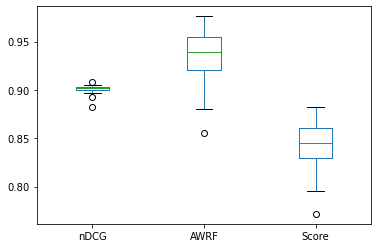

In [8]:
met09.plot.box()

Let's plot the utility-fairness tradeoff for our topics:

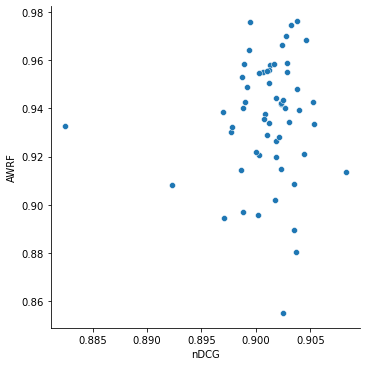

In [9]:
sns.relplot(x='nDCG', y='AWRF', data=met09)